### GPU, cuda, gccの確認


In [1]:
!nvidia-smi
!nvcc --version
!gcc --version

Fri Nov 21 16:18:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8             10W /   90W |      11MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### パッケージのインストール / クリーンインストール
ssh先のjupyter環境などで実行の場合は, 当該環境にパッケージをインストール

In [2]:
# クリーンが必要であれば実行
!rm -rf kineticEQ
!rm -rf build

In [3]:
# インストール
!git clone https://github.com/Minamium/kineticEQ.git
!pip install -e ./kineticEQ

Cloning into 'kineticEQ'...
remote: Enumerating objects: 1105, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 1105 (delta 119), reused 195 (delta 77), pack-reused 865 (from 1)
Receiving objects: 100% (1105/1105), 422.05 KiB | 6.92 MiB/s, done.
Resolving deltas: 100% (569/569), done.
Obtaining file:///home/arlm/workspace/kineticEQ
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for kineticEQ (pyproject.toml) ... done
  Created wheel for kineticEQ: filename=kineticeq-0.4.0-0.editable-py3-none-any.whl size=2710 sha256=d4135672a3c46fd9de73bcc3d90a36cffb266cce39d75b6cb8fb9e4ec160ecc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-tep8g_08/wheels/5c/8f/4c/777f8eab2b3d762127884b756300580189ab20868ab32d31f6
Successfully built kineticEQ
  Attem

### 動作確認

--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF gtsv_binding.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/gtsv/gtsv_binding.cpp -o gtsv_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output gtsv_batch.cuda.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages

Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF block_tridiag_binding.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/lo_blocktridiag/block_tridiag_binding.cpp -o block_tridiag_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output block_tridiag_kernel.cuda.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isys

Loading extension module lo_blocktridiag...
NoneType: None


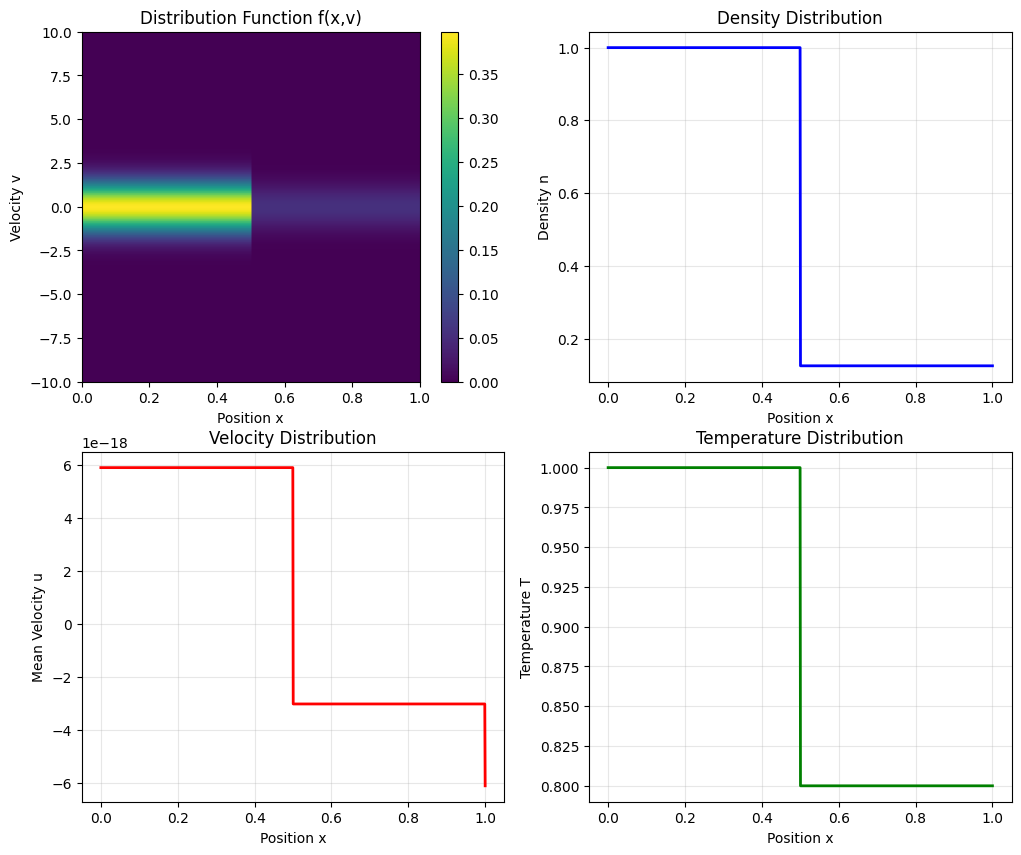

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.0000, min=-0.0000, max=0.0000
Temperature: mean=0.9000, min=0.8000, max=1.0000
--- run simulation ---
--- Starting implicit time evolution ---
CFL number: 0.4995


Implicit Evolution:   0%|                                                                | 0/1001 [00:00<?, ?it/s]

Step     0/1000 (t=0.000)
Picard iteration:     2, residual: 1.220658e-05
LO iteration: [3, 3], residual: [4.971495062526185e-05, 4.9697467542964e-05]


Implicit Evolution:  10%|█████▍                                                 | 99/1001 [00:01<00:13, 64.82it/s]

Step   100/1000 (t=0.005)
Picard iteration:     2, residual: 3.705332e-07
LO iteration: [2, 2], residual: [4.2979488433236845e-05, 4.2973655232009245e-05]


Implicit Evolution:  20%|██████████▋                                           | 197/1001 [00:03<00:12, 65.27it/s]

Step   200/1000 (t=0.010)
Picard iteration:     2, residual: 2.595220e-07
LO iteration: [2, 2], residual: [3.097524920131489e-05, 3.0961780063745725e-05]


Implicit Evolution:  29%|███████████████▉                                      | 295/1001 [00:04<00:10, 65.46it/s]

Step   300/1000 (t=0.015)
Picard iteration:     2, residual: 2.110159e-07
LO iteration: [2, 2], residual: [2.945247269350859e-05, 2.944095696759408e-05]


Implicit Evolution:  40%|█████████████████████▌                                | 400/1001 [00:06<00:09, 65.19it/s]

Step   400/1000 (t=0.020)
Picard iteration:     2, residual: 2.057589e-07
LO iteration: [2, 2], residual: [2.7594842620187743e-05, 2.7583870095229668e-05]


Implicit Evolution:  50%|██████████████████████████▊                           | 498/1001 [00:07<00:07, 65.02it/s]

Step   500/1000 (t=0.025)
Picard iteration:     2, residual: 1.917846e-07
LO iteration: [2, 2], residual: [2.709351965382578e-05, 2.7083711283043543e-05]


Implicit Evolution:  60%|████████████████████████████████▏                     | 596/1001 [00:09<00:06, 65.51it/s]

Step   600/1000 (t=0.030)
Picard iteration:     2, residual: 1.940169e-07
LO iteration: [2, 2], residual: [2.6425324838194597e-05, 2.6415153892123122e-05]


Implicit Evolution:  69%|█████████████████████████████████████▍                | 694/1001 [00:10<00:04, 65.48it/s]

Step   700/1000 (t=0.035)
Picard iteration:     2, residual: 1.824990e-07
LO iteration: [2, 2], residual: [2.644218536634879e-05, 2.6432635000295246e-05]


Implicit Evolution:  80%|███████████████████████████████████████████           | 799/1001 [00:12<00:03, 65.42it/s]

Step   800/1000 (t=0.040)
Picard iteration:     2, residual: 1.907780e-07
LO iteration: [2, 2], residual: [2.5750391694515096e-05, 2.574067512070566e-05]


Implicit Evolution:  90%|████████████████████████████████████████████████▍     | 897/1001 [00:14<00:01, 65.56it/s]

Step   900/1000 (t=0.045)
Picard iteration:     2, residual: 1.743124e-07
LO iteration: [2, 2], residual: [2.6228347254228512e-05, 2.6218708451153372e-05]


Implicit Evolution:  99%|█████████████████████████████████████████████████████▋| 995/1001 [00:15<00:00, 65.35it/s]

Step  1000/1000 (t=0.050)
Picard iteration:     2, residual: 1.891337e-07
LO iteration: [2, 2], residual: [2.514839350720166e-05, 2.513911933366142e-05]


Implicit Evolution: 100%|█████████████████████████████████████████████████████| 1001/1001 [00:15<00:00, 64.01it/s]

Time evolution completed!
--- run simulation complete, Result is saved in self.f ---


<Figure size 640x480 with 0 Axes>

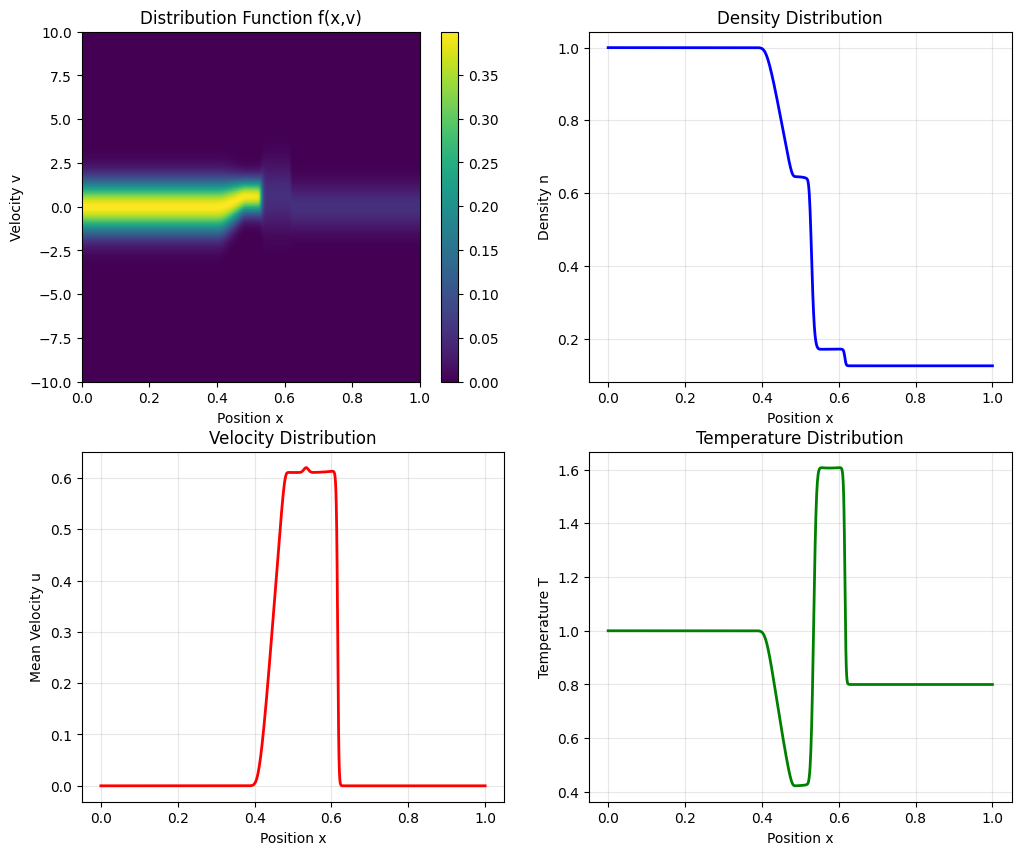

Density: mean=0.5626, min=0.1250, max=1.0000
Velocity: mean=0.1046, min=-0.0000, max=0.6200
Temperature: mean=0.9193, min=0.4227, max=1.6074
Creating GIF with 11 frames...
  Frame 3/11 processed
  Frame 6/11 processed
  Frame 9/11 processed
GIF saved: 'base_bench.gif' (11 frames)


<Figure size 640x480 with 0 Axes>

In [4]:
# import packages
%run kineticEQ/tests/base/base_test.py --T_total 0.05